<a href="https://colab.research.google.com/github/Moukthika1253/Reddit-comments-text-classifier/blob/main/SubReddit_category_text_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading dataset**

In [1]:
import pandas as pd
post_df=pd.read_csv('/content/Top_Posts.csv')
comment_df=pd.read_csv('/content/Top_Posts_Comments.csv')

In [2]:
post_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,https://v.redd.it/25nxi9ojfha61,Discussion,5851,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,https://v.redd.it/rlmmjm1q5wu41,Research,4761,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,https://v.redd.it/ikd5gjlbi8k61,News,4688,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,https://i.redd.it/34sgziebfia71.jpg,Discussion,4568,228,0.96,2021-07-11 04:18:59,2021


In [4]:
comment_df.head()

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...


In [3]:
post_comment_df=pd.merge(post_df,comment_df,how='inner',on='post_id')
post_comment_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...


In [4]:
target_df=post_comment_df[['post_id','subreddit','comment']]
target_df.head()

,post_id,subreddit,comment
0,gh1dj9,MachineLearning,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,MachineLearning,The future 🤯
2,gh1dj9,MachineLearning,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,MachineLearning,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,MachineLearning,Ohh the nightmare of making this into a stable...


**Split into Train, Dev, Test dataset**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_remaining, y_train, y_remaining= train_test_split(target_df['comment'],target_df['subreddit'],train_size=0.5,stratify=target_df['subreddit'])
X_test, X_dev, y_test, y_dev = train_test_split(X_remaining,y_remaining,test_size=0.3,stratify=y_remaining)
train_set=pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
dev_set=pd.concat([X_dev,y_dev],axis=1).reset_index(drop=True)
test_set=pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
print(f"Train set size:  ",train_set.size)
print(f"Dev set size:  ",dev_set.size)
print(f"Test set size:  ",test_set.size)

Train set size:   223168
Dev set size:   66952
Test set size:   156216


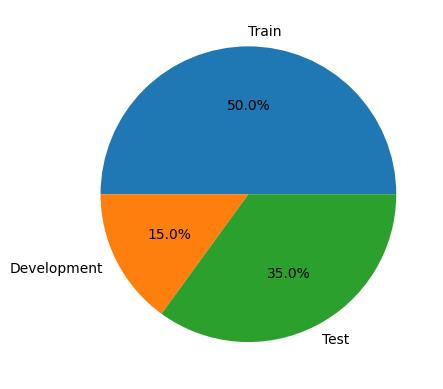

In [60]:
from matplotlib.pyplot import pie,show
import pandas as pd
datasplit=['Train', 'Development','Test']
size=[train_set.size,dev_set.size,test_set.size]
pie(size,labels=datasplit,autopct='%.1f%%')
show()


In [61]:
train_set.head()

,comment,subreddit
0,The entire project I've been assigned to freel...,MachineLearning
1,Well that's why then.. I fall in the former. T...,datascience
2,More like denoising. Nicely done! bb,artificial
3,Really? I feel like real pictures of similar a...,artificial
4,Could you also elaborate? I have been thinking...,datascience


**Deleting empty comments**

In [62]:
import numpy as np
train_set.isna().sum()

comment      5
subreddit    0
dtype: int64

In [63]:
train_set['comment'].replace('',np.nan,inplace=True)
train_set.dropna(subset=['comment'],inplace=True)
train_set.isna().sum()


comment      0
subreddit    0
dtype: int64

In [64]:
train_copy=train_set.copy()
train_copy.head()

,comment,subreddit
0,The entire project I've been assigned to freel...,MachineLearning
1,Well that's why then.. I fall in the former. T...,datascience
2,More like denoising. Nicely done! bb,artificial
3,Really? I feel like real pictures of similar a...,artificial
4,Could you also elaborate? I have been thinking...,datascience


**Pre-processing**

In [149]:
import string,re
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def text_preprocess(comment):
  tokens=[word for word in word_tokenize(comment)]
  tokens1=[word.lower() for word in tokens if word.lower() not in stopwords.words('english')]
  for i in range(len(tokens1)):
   tokens1[i]= ''.join([word for word in tokens1[i] if word not in (string.punctuation)])
  tokens2=[word for word in tokens1 if word]
  tokens3=[re.sub(r'\s\s+','',word) for word in tokens2]
  word_lem=WordNetLemmatizer()
  lem_words=[word_lem.lemmatize(word) for word in tokens3]
  return lem_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
train_copy['comment']=train_copy['comment'].apply(text_preprocess)
train_copy.head()

,comment,subreddit
0,"[entire, project, ve, assigned, freely, altern...",MachineLearning
1,"[well, s, fall, former, thanks, warning]",datascience
2,"[like, denoising, nicely, done, bb]",artificial
3,"[really, feel, like, real, picture, similar, a...",artificial
4,"[could, also, elaborate, thinking, getting, he...",datascience


In [67]:
text_preprocess("Likely, and it will be easier for them, the processing could be done in the iPhone and uploading can be done through airdrop (which supports 'aiming' at people and machines to share files).")

['likely',
 'easier',
 'processing',
 'could',
 'done',
 'iphone',
 'uploading',
 'done',
 'airdrop',
 'support',
 'aiming',
 'people',
 'machine',
 'share',
 'file']

**Calculating total number of words in all comments**

In [68]:
word_list=[]
for comment in train_copy['comment']:
  for word in comment:
    word_list.append(word)
word_list= list(set(word_list))
total=len(word_list)
print(f'total number of words in vocabulary: {total}')

total number of words in vocabulary: 86649


In [69]:
from collections import defaultdict
AI_category=0
ML_category=0
DataScience_category=0
num_AI_words=0
num_ML_words=0
num_Datasci_words=0
AI_words=[]
ML_words=[]
DS_words=[]
word_dict=defaultdict(lambda:[0,0,0])
category=list(train_copy['subreddit'])

**Calculating word frequencies of each word in every comment**

In [168]:
for i, comment in enumerate(list(train_copy['comment'])):
  if  category[i] == 'artificial':
    AI_category=AI_category+1
  elif category[i] == 'MachineLearning':
    ML_category=ML_category+1
  else:
    DataScience_category=DataScience_category+1
  for word in (comment):
    if category[i] == 'artificial':
      word_dict[word][0]+=1
      AI_words.append(word)
      num_AI_words+=1 
    elif category[i] == 'MachineLearning':
      word_dict[word][1]+=1
      ML_words.append(word)
      num_ML_words+=1
    else:
      word_dict[word][2]+=1
      DS_words.append(word)
      num_Datasci_words+=1

In [79]:
word_dict

defaultdict(<function __main__.<lambda>()>,
            {'entire': [146, 828, 820],
             'project': [396, 2988, 5862],
             've': [658, 4480, 7088],
             'assigned': [14, 52, 110],
             'freely': [14, 82, 28],
             'alternate': [6, 56, 24],
             'space': [240, 1562, 782],
             'tab': [0, 54, 66],
             'copypasta': [2, 16, 14],
             'code': [452, 5242, 5562],
             'slack': [8, 100, 140],
             'ugh': [4, 30, 90],
             'well': [1016, 6072, 6472],
             's': [6622, 36176, 30932],
             'fall': [66, 338, 458],
             'former': [18, 200, 330],
             'thanks': [548, 3670, 2864],
             'warning': [32, 108, 70],
             'like': [3296, 18110, 19956],
             'denoising': [4, 44, 2],
             'nicely': [10, 106, 140],
             'done': [418, 2510, 3398],
             'bb': [2, 10, 10],
             'really': [1410, 7984, 9682],
             'feel': [38

In [172]:
def remove_rare(word_dict):
 word_dict_copy=word_dict.copy()
 count=0
 for i, (k,v) in enumerate(word_dict_copy.items()):
  if (v[0]<3 and v[1]<3 and v[2]<3):
    del(k)
    count+=1
 no_rarewords=total-remove_rare()
 return word_dict

In [81]:
print(f"Total number of rare words: {remove_rare}")

Total number of rare words: 52673


In [82]:
no_rarewords=total-remove_rare()
print(f'Total number of words after removing rarewords: {no_rarewords}')

Total number of words after removing rarewords: 33976


# Probability Calculation

**P(Artificial Intelligence), P(Machine Learning), P(Data Science)**

In [75]:
prob_AI=train_copy['subreddit'].value_counts(normalize=True)['artificial']
prob_ML=train_copy['subreddit'].value_counts(normalize=True)['MachineLearning']
prob_DS=train_copy['subreddit'].value_counts(normalize=True)['datascience']
print(f"P(Artificial Intelligence) = {prob_AI} P(Machine Learning) = {prob_ML} P(Data Science) = {prob_DS}")

P(Artificial Intelligence) = 0.09096693822314235 P(Machine Learning) = 0.42885309959759454 P(Data Science) = 0.4801799621792631


**P(Artificial Intelligence|word), P(Machine Learning|word), P(Datas cience|word)**

In [84]:
import math
features=1 #feature=comments
def cond_prob(category,word,alpha):
  if alpha == 'no':
   if category == 'artificial':
    return math.log(word_dict[word][0]/num_AI_words)
   elif category == 'MachineLearning':
    return math.log(word_dict[word][1]/num_ML_words)
   else:
    return math.log(word_dict[word][2]/num_Datasci_words)
  else:
    if category == 'artificial':
     return math.log(word_dict[word][0]+alpha/num_AI_words+features*alpha)
    elif category == 'MachineLearning':
     return math.log(word_dict[word][1]+alpha/num_ML_words+features*alpha)
    else:
     return math.log(word_dict[word][2]/num_Datasci_words+features*alpha)

In [105]:
print("With no alpha P(word=string|Artificial Intelligence) = ",cond_prob('artificial','string','no'))

With no alpha P(word=string|Artificial Intelligence) =  -10.032740360613557


In [103]:
print("With no alpha P(word=string|Machine Learning) = ",cond_prob('MachineLearning','string','no'))

With no alpha P(word=westworld|Machine Learning) =  -9.940009058961609


In [106]:
print("With no alpha P(word=string|Data Science) = ",cond_prob('datascience','string','no'))

With no alpha P(word=string|Data Science) =  -9.442631189961178


Among the three probablities, Prob is higher for category=datascience therefore the word 'string' belongs to datascience category

**Calculating Probability where evidence = comment, hypothesis=subreddit category P(Artificial Intelligence|comment), P(Machine Learning|comment), P(Data Science|comment)**

In [107]:
def comment_probability(category, comment,alpha):
  if category == 'artificial':
    prob=math.log(AI_category/len(train_copy))
  elif category == 'MachineLearning':
    prob=math.log(ML_category/len(train_copy))
  else:
    prob=math.log(DataScience_category/len(train_copy))
  preprocessed_comments=[]
  preprocessed_comments=text_preprocess(comment)
  for word in preprocessed_comments:
     prob=prob+cond_prob(category,word,alpha)
  return prob

**Predicting class**

In [147]:
def predict_class(comment,alpha):
 if (comment_probability('artificial',comment,alpha)*prob_AI > comment_probability('MachineLearning',comment,alpha)*prob_ML) and (comment_probability('artificial',comment,alpha)*prob_AI > comment_probability('datascience',comment,alpha)*prob_DS):
   return "artificial"
 elif (comment_probability('MachineLearning',comment,alpha)*prob_ML > comment_probability('artificial',comment,alpha)*prob_AI) and (comment_probability('MachineLearning',comment,alpha)*prob_ML > comment_probability('datascience',comment,alpha)*prob_DS):
    return "MachineLearning"
 else:
    return "datascience"

**probability of a comment and class prediction**

In [109]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.','no'))

ValueError: ignored

**Original Category**

In [135]:
print(post_comment_df.query('comment=="This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits."')['subreddit'])

252    MachineLearning
Name: subreddit, dtype: object


**Predicted category**

In [110]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',0.5))

63.78766290042051


In [126]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',0.5)

'Machine Learning'

In [111]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1))

64.70714697283265


In [127]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1)

'Machine Learning'

In [112]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',10))

70.03957256813901


In [128]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',10)

'Machine Learning'

In [113]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',100))

83.28625958269187


In [130]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',100)

'Machine Learning'

In [114]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1000))

106.62889415077682


In [131]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1000)

'Data Science'

In [115]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',5000))

127.53354231383884


In [132]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',5000)

'Data Science'

If we observe the probabilities, the highest probability is achieved when alpha=5000, but wif we observe the class prediction, it is wrong when alpha is both 1000 and 5000. This means the hyperparameter tuning didnt work when alpha is 1000 and 5000

**Calculating accuracy on Dev set**

In [157]:
dev_set.isna().sum()

comment      3
subreddit    0
dtype: int64

In [158]:
dev_set['comment'].replace('',np.nan,inplace=True)
dev_set.dropna(subset=['comment'],inplace=True)
dev_set.isna().sum()

comment      0
subreddit    0
dtype: int64

In [170]:
def create_dict(df):
 for i, comment in enumerate(list(df)):
  if  category[i] == 'artificial':
    AI_category=AI_category+1
  elif category[i] == 'MachineLearning':
    ML_category=ML_category+1
  else:
    DataScience_category=DataScience_category+1
  for word in (comment):
    if category[i] == 'artificial':
      word_dict[word][0]+=1
      AI_words.append(word)
      num_AI_words+=1 
    elif category[i] == 'MachineLearning':
      word_dict[word][1]+=1
      ML_words.append(word)
      num_ML_words+=1
    else:
      word_dict[word][2]+=1
      DS_words.append(word)
      num_Datasci_words+=1
    return word_dict

In [165]:
def find_accuracy(alpha):
 correct_pred=0
 incorrect_pred=0
 subreddit=list(dev_set['subreddit'])
 for i, comment in enumerate(list(dev_set['comment'])):
   if predict_class(comment,alpha) == subreddit[i]:
    correct_pred+=1
   else:
    incorrect_pred+=1
 return (f"Accuracy when alpha is {alpha}= {correct_pred/(correct_pred+incorrect_pred)}")

**Alpha = 0.5**

In [161]:
find_accuracy(0.5)

0.42765811250858904

In [167]:
find_accuracy(1)

'Accuracy when alpha is 1= 0.4298688495205091'

In [173]:
find_accuracy(10)

'Accuracy when alpha is 10= 0.4301377229408777'

In [174]:
find_accuracy(100)

'Accuracy when alpha is 100= 0.43237833477728316'

**comparision of alpha values**

<Axes: >

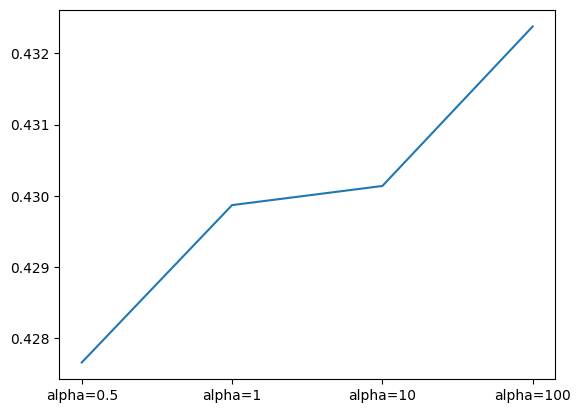

In [188]:
import seaborn as sns
acc=[0.42765811250858904,0.4298688495205091,0.4301377229408777,0.43237833477728316]
label=['alpha=0.5','alpha=1','alpha=10','alpha=100']
sns.lineplot(data=None,x=label,y=acc)

Among all the accuracies, the accuracy is higher for alpha = 100. Therefore, I will use alpha= 100 for finding the accuracy of test dataset

**Test Accuracy**

In [181]:
test_set.isna().sum()

comment      1
subreddit    0
dtype: int64

In [182]:
test_set['comment'].replace('',np.nan,inplace=True)
test_set.dropna(subset=['comment'],inplace=True)
test_set.isna().sum()

comment      0
subreddit    0
dtype: int64

In [184]:
def test_accuracy(alpha):
 correct_pred=0
 incorrect_pred=0
 subreddit=list(test_set['subreddit'])
 for i, comment in enumerate(list(test_set['comment'])):
   if predict_class(comment,alpha) == subreddit[i]:
    correct_pred+=1
   else:
    incorrect_pred+=1
 return (f"Accuracy when alpha is {alpha}= {correct_pred/(correct_pred+incorrect_pred)}")

In [185]:
test_accuracy(100)

'Accuracy when alpha is 100= 0.43279091502682215'

<Axes: >

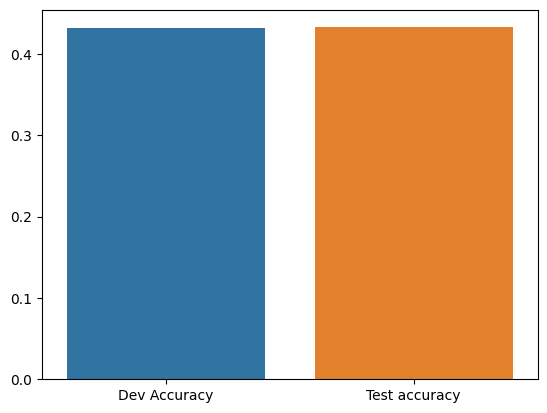

In [192]:
acc=[0.43237833477728316,0.43279091502682215]
label=['Dev Accuracy','Test accuracy']
sns.barplot(data=None,x=label,y=acc)

**KNN Text classifier**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
knn_train=train_set.copy()

In [9]:
knn_train.isna().sum()

comment      2
subreddit    0
dtype: int64

In [10]:
import numpy as np
knn_train.replace('',np.nan,inplace=True)
knn_train.dropna(inplace=True)
knn_train.isna().sum()

comment      0
subreddit    0
dtype: int64

In [11]:
dev_set.isna().sum()

comment      1
subreddit    0
dtype: int64

In [12]:
import numpy as np
dev_set.replace('',np.nan,inplace=True)
dev_set.dropna(inplace=True)
dev_set.isna().sum()

comment      0
subreddit    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_remaining, y_train, y_remaining= train_test_split(test_set['comment'],test_set['subreddit'],train_size=0.5,stratify=test_set['subreddit'])
X_test, X_dev, y_test, y_dev = train_test_split(X_remaining,y_remaining,test_size=0.3,stratify=y_remaining)
train_set=pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
dev_set=pd.concat([X_dev,y_dev],axis=1).reset_index(drop=True)
test_set=pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
print(f"Train set size:  ",train_set.size)
print(f"Dev set size:  ",dev_set.size)
print(f"Test set size:  ",test_set.size)

Train set size:   78108
Dev set size:   23434
Test set size:   54674


In [7]:
knn_train=train_set.copy()
knn_train

,comment,subreddit
0,I've seriously been considering just migrating...,datascience
1,[deleted],datascience
2,Really surprised you forgot the best online re...,MachineLearning
3,"Im currently studying calculus, so yes. Had to...",datascience
4,Startups can be a toxic environment to land yo...,datascience
...,...,...
39049,"Weird, why are you and the OP getting disliked...",artificial
39050,Do you happen to have a link to the full paper...,MachineLearning
39051,PhD in Math,datascience
39052,major companies are making plug and play ML sy...,MachineLearning


In [13]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(knn_train['comment'])
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [14]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(knn_train['comment'])
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
# training our classifier ; train_data.target will be having numbers assigned for each category in train data
clf = knn.fit(X_train_tfidf, knn_train['subreddit'])
# Input Data to predict their classes of the given categories
docs_new = ['Really surprised you forgot the best online resource on deep learning theory: https://mjt.cs.illinois.edu/dlt/ by the great Matus Telgarsky', 'Im currently studying calculus, so yes. Had to recap precalc and algebra though. Iâ€™d maybe make it 200 pages in and then struggle to follow, especially before anything university level. These books tend to blur the lines and go from the beginning to quite advanced.']
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [17]:
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, predicted))

'Really surprised you forgot the best online resource on deep learning theory: https://mjt.cs.illinois.edu/dlt/ by the great Matus Telgarsky' => ['MachineLearning' 'datascience']
'Im currently studying calculus, so yes. Had to recap precalc and algebra though. Iâ€™d maybe make it 200 pages in and then struggle to follow, especially before anything university level. These books tend to blur the lines and go from the beginning to quite advanced.' => ['MachineLearning' 'datascience']


In [18]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', knn),
])
pipeline.fit(knn_train['comment'], knn_train['subreddit'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])

**Accuracy of Dev dataset**

In [ ]:
# Predicting our dev data
predicted_data = pipeline.predict(dev_set['comment'])
print('We got an accuracy of',np.mean(predicted_data == dev_set['subreddit'])*100, '% over the dev data.')

**Using cross validation to choose best k**

In [ ]:
import matplotlib.pyplot as plt
k_values = [i for i in range (1,6)]
scores = []
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', knn),
])
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

.

pipeline.fit(knn_train['comment'], knn_train['subreddit'])
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

**Accuracy over Test dataset**

In [ ]:
pipeline.fit(knn_train['comment'], knn_train['comment'])
# Predicting our test data
predicted_data = pipeline.predict(test_set['comment'])
print('We got an accuracy of',np.mean(predicted_data == test_set['subreddit'])*100, '% over the test data.')

In [ ]:
X=train_set['comment']
y=train_set['subreddit']

**SVM Text classifier**

In [ ]:
from sklearn import svm
from sklearn import metrics
svm_train=train_set.copy()
linear_svm = svm.SVC(kernel='linear', C = 1.0)
linear_svm.fit(X,y)
predictions_svm=linear_svm.predict(X_dev)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,predictions_svm))

In [ ]:
predictions_svm=linear_svm.predict(X_test)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,predictions_svm))

**Logistic Regression Text classifier**

In [ ]:
from sklearn import linear_model
lr_model= linear_model.LogisticRegression(max_iter=1000)  
lr_model.fit(X, y)  
dev_lr = lr_model.predict(X_dev)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,dev_lr))

In [ ]:
test_lr = lr_model.predict(X_test)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,test_lr))

**Decision Tree Text classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
dc.fit(X,y)
dev_dc=dc.predict(X_dev)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,dev_dc))

In [ ]:
test_dc=dc.predict(X_test)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,test_dc))

**Random Forest Text classifier**

In [ ]:
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
dev_rf = model.predict(X_dev)
print_function("Accuracy of Dev set:",metrics.accuracy_score(y_dev,dev_rf))

In [ ]:
test_rf=model.predict(X_test)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,test_rf))